### Assignment Topic: Implement Dynamic Table with insert and delete operation

#### Method for Graph Plot

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
sns.set()
def plotGraph(op): #function for ploting graphs
    global SIZE,NUM,Potential,AcCost,AmCost
    op=np.arange(op+1)
    plt.figure()
    plt.rcParams['figure.figsize'] = (18,16)
    plt.figure().subplots_adjust(hspace=0.2)
    plt.subplot(211)
    plt.title('Plot Num(i) Size(i) and Potential(i)')
    plt.xlabel('Number of operations') # Name the x-axis
    plt.ylabel('values')# Name the y-axis
    l1,l2=plt.plot(op,NUM,':k'),plt.plot(op,SIZE,'-g')
    l3=plt.plot(op,Potential,'--r')
    plt.setp(l1,linewidth=3)
    plt.setp(l2,linewidth=2)
    plt.setp(l3,linewidth=2)
    black_line=mlines.Line2D([],[],color='black',ls=':',
                             markersize=15,label='NUM')
    green_line=mlines.Line2D([],[],color='green',ls='-',
                             markersize=15,label='SIZE')
    red_line=mlines.Line2D([],[],color='red',ls='--',
                           markersize=15,label='Potential')
    plt.legend(handles=[black_line,green_line,red_line])
    
    plt.subplot(212)
    plt.title('Actual Cost and Amortised Cost')
    plt.xlabel('Number of operations') # Name the x-axis
    plt.ylabel('values')# Name the y-axis
    l1,l2=plt.plot(op,AcCost,'-r'),plt.plot(op,AmCost,':b')
    plt.setp(l1,linewidth=2)
    plt.setp(l2,linewidth=3)
    red_line = mlines.Line2D([], [], color='red', ls='-',
                             markersize=15, label='Actual Cost')
    blue_line = mlines.Line2D([], [], color='blue', ls=':',
                              markersize=15, label='Amortized Cost')
    plt.legend(handles=[red_line,blue_line])
    
    plt.show()

#### Calculate Num(i) Size(i) alpha(i)
#### Load Factor, alpha(i) = Num(i) / Size(i)

In [2]:
def num(): #for counting total elements present in the stack
    num=0
    for x in arr:
        if (x!=None):
            num=num+1
    return num
size = lambda :len(arr) #for getting the size of the array
def alpha(): #for calculating the value of alpha   
    return float(num()/len(arr))

#### Calculate Potential 
#### Potential(i) =[ (2*Num(i) - Size(i)), if alpha(i) >=1/2 = ] and [(Size(i)/2 - Num(i)), if alpha(i) < 1/2]

In [3]:
def phi(): #For calculating the potential function
    if (alpha()<0.5):
        return (len(arr)/2-num())
    else:
        return (2*num()-len(arr))

#### INSERT DELETE Function for expansion and contraction

In [4]:
def expansion(): 
    #for expanding the array into double size when elements are full
    global arr
    temp=[None]*(size()*2)
    for i in range(0,size()):
        if arr[i]==None:
            break
        else:
            temp[i]=arr[i]
    arr=temp    
def contraction(): 
    #for contracting the array by half size when elements are below quarter
    global arr
    temp=[None]*(int(size()/2))
    for i in range(0,size()):
        if arr[i]==None:
            break
        else:
            temp[i]=arr[i]
    arr=temp 
def insert(val):
    if alpha()==1:
        expansion()
    arr[num()]=val
def delete(val):
    if alpha()<=0.25:
        contraction() 
    arr[num()-1]=None  

#### Getting Amortised Cost of Dynamic Table

In [5]:
#declaring empty array(stack) for storing dymanic table
arr=[None]
empty=1 #flag to denote begining condition
print('Enter Number of Input Operations:')
op=int(input())
NUM,SIZE,Potential=[0]*(op+1),[0]*(op+1),[0]*(op+1)
AcCost,AmCost=[0]*(op+1),[0]*(op+1)
print('Enter Data:[format <insert/delete><space><Value>] {} times:'.format(op))
def empty():
    print('\nBegining Array\n{}'.format(arr))
    AcCost[0],AmCost[0]=0,0
    print('NUM={} SIZE={} Potential={} Actual Cost={} Amortized Cost={}\n'.
          format(NUM[0],SIZE[0],Potential[0],AcCost[0],AmCost[0]))
for i in range(1,op+1):
    method,val=input().split()
    if (empty): #At the begining Array
        NUM[0],SIZE[0],Potential[0]=num(),0,0
        empty()
        empty=0
    if method.lower()=='insert':
        insert(int(val))
    if method.lower()=='delete':
        delete(int(val))
    #Getting values of NUMi,SIZEi,Potential
    NUM[i],SIZE[i],Potential[i]=num(),size(),phi() 
    #Calculating actual cost of operation
    if( NUM[i]>NUM[i-1] and SIZE[i]==int(SIZE[i-1])*2 ): 
        AcCost[i]=NUM[i] #expansion and insert both occurs
    elif( NUM[i]<NUM[i-1] and int(2*SIZE[i])==SIZE[i-1] ): 
        AcCost[i]=NUM[i]+1 #contraction and delete 
    else:
        AcCost[i]=1
    AmCost[i]=AcCost[i]+Potential[i]-Potential[i-1] #Amortised cost
    print(arr)
    print('NUM={} SIZE={} Potential={} Actual Cost={} Amortized Cost={}\n'.
          format(num(),size(),phi(),AcCost[i],AmCost[i]))
print("\nComputing Complete")

Enter Number of Input Operations:
24
Enter Data:[format <insert/delete><space><Value>] 24 times:
insert 1

Begining Array
[None]
NUM=0 SIZE=0 Potential=0 Actual Cost=0 Amortized Cost=0

[1]
NUM=1 SIZE=1 Potential=1 Actual Cost=1 Amortized Cost=2

insert 2
[1, 2]
NUM=2 SIZE=2 Potential=2 Actual Cost=2 Amortized Cost=3

insert 3
[1, 2, 3, None]
NUM=3 SIZE=4 Potential=2 Actual Cost=3 Amortized Cost=3

insert 4
[1, 2, 3, 4]
NUM=4 SIZE=4 Potential=4 Actual Cost=1 Amortized Cost=3

insert 5
[1, 2, 3, 4, 5, None, None, None]
NUM=5 SIZE=8 Potential=2 Actual Cost=5 Amortized Cost=3

delete 5
[1, 2, 3, 4, None, None, None, None]
NUM=4 SIZE=8 Potential=0 Actual Cost=1 Amortized Cost=-1

delete 4
[1, 2, 3, None, None, None, None, None]
NUM=3 SIZE=8 Potential=1.0 Actual Cost=1 Amortized Cost=2.0

delete 3
[1, 2, None, None, None, None, None, None]
NUM=2 SIZE=8 Potential=2.0 Actual Cost=1 Amortized Cost=2.0

delete 2
[1, None, None, None]
NUM=1 SIZE=4 Potential=1.0 Actual Cost=2 Amortized Cost=1.0



#### Calling the plot method

<Figure size 432x288 with 0 Axes>

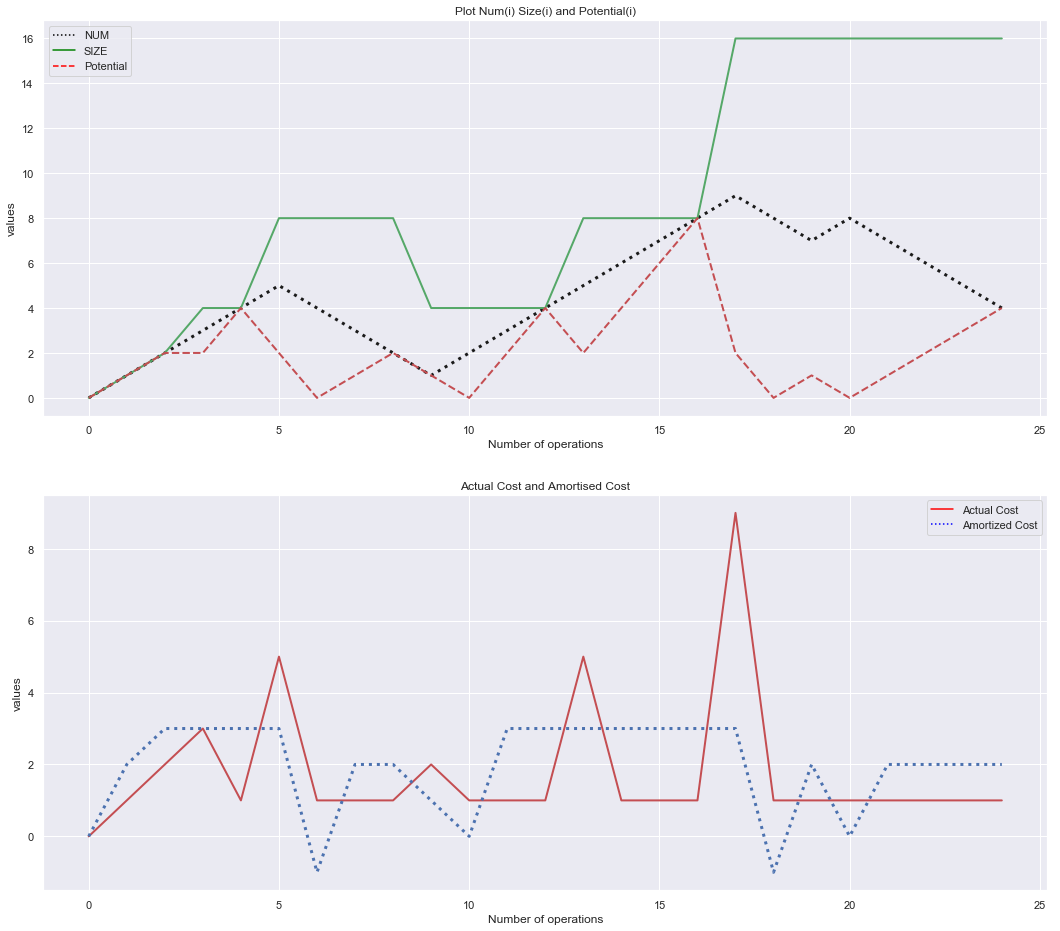

In [6]:
plotGraph(op)